In [1]:
import MuMoT as mmt

Created `%%model` as an alias for `%%latex`.


In [2]:
%%model
$
U -> A : g_1
U -> B : g_2
A -> U : a_1
B -> U : a_2
A + U -> A + A : r_1
B + U -> B + B : r_2
A + B -> A + U : s
A + B -> B + U : s
$

<IPython.core.display.Latex object>

In [3]:
model1 = mmt.parseModel(In[2])

In [4]:
model2 = model1.substitute('a_1 = 1/v_1, a_2 = 1/v_2, g_1 = v_1, g_2 = v_2, r_1 = v_1, r_2 = v_2')

In [5]:
model3 = model2.substitute('v_1 = \\mu + \\Delta/2, v_2 = \\mu - \\Delta/2')

In [6]:
model3.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
model3.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
model4 = model3.substitute('U = N - \A - \B')

In [9]:
model4.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
#modelBifCont1 = model4.bifurcation('s','A')

In [11]:
model5 = model2.substitute('v_1 = v, v_2 = v')

In [12]:
model6 = model5.substitute('U = N - \A - \B')

In [13]:
model6.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [14]:
#modelBifCont2 = model6.bifurcation('s','A')

In [15]:
#modelBifCont1.showLogs()

bar<ipywidgets.widgets.widget_string.HTML object at 0x10c2694e0>


<IPython.core.display.Javascript object>


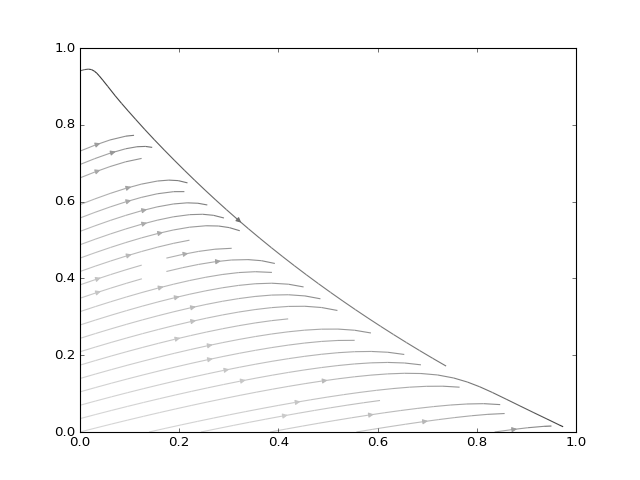

In [16]:
modelStreamCont1 = model4.stream('A', 'B')

In [17]:
modelStreamCont1.showLogs()

Starting 2d stream plot with parameters (Delta=10.0), (s=10.0), (mu=10.0), at 2017-09-15 15:48:48.010491


bar<ipywidgets.widgets.widget_string.HTML object at 0x10c49ffd0>


<IPython.core.display.Javascript object>


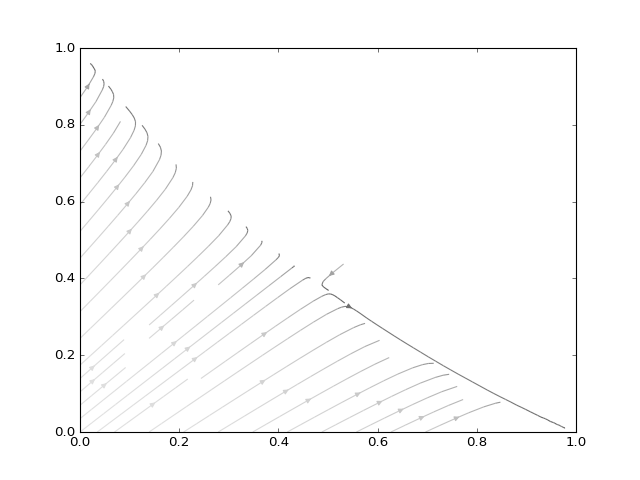

In [18]:
modelStreamCont2 = model6.stream('A', 'B')

In [19]:
modelStreamCont2.showLogs()

Starting 2d stream plot with parameters (s=10.0), (v=10.0), at 2017-09-15 15:48:49.057790


bar<ipywidgets.widgets.widget_string.HTML object at 0x10c576588>


<IPython.core.display.Javascript object>


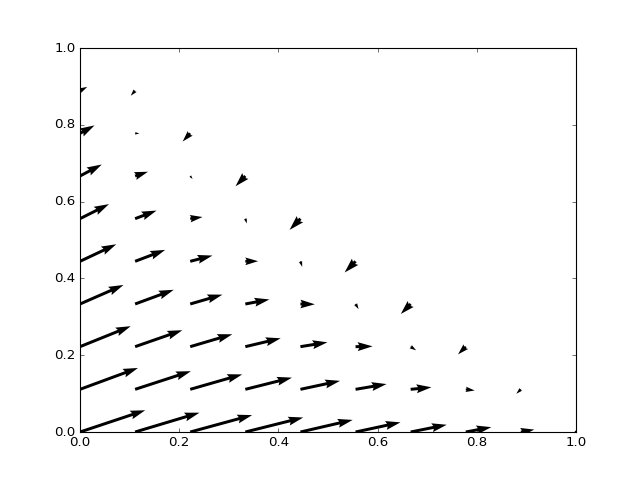

In [20]:
modelVectorCont1 = model4.vector('A', 'B')

In [21]:
modelVectorCont1.showLogs()

Starting 2d vector plot with parameters (Delta=10.0), (s=10.0), (mu=10.0), at 2017-09-15 15:48:49.936295


In [22]:
%%model
$
U -> A : g_1
U -> B : g_2
U -> C : g_3
A -> U : a_1
B -> U : a_2
C -> U : a_3
A + U -> A + A : r_1
B + U -> B + B : r_2
C + U -> C + C : r_3
A + B -> A + U : s
A + B -> B + U : s
A + C -> A + U : s
A + C -> C + U : s
B + C -> B + U : s
B + C -> C + U : s
$

<IPython.core.display.Latex object>

In [23]:
model7 = mmt.parseModel(In[22])

In [24]:
model8 = model7.substitute('U = N - A - B - C')

bar<ipywidgets.widgets.widget_string.HTML object at 0x10c5cfcf8>


<IPython.core.display.Javascript object>


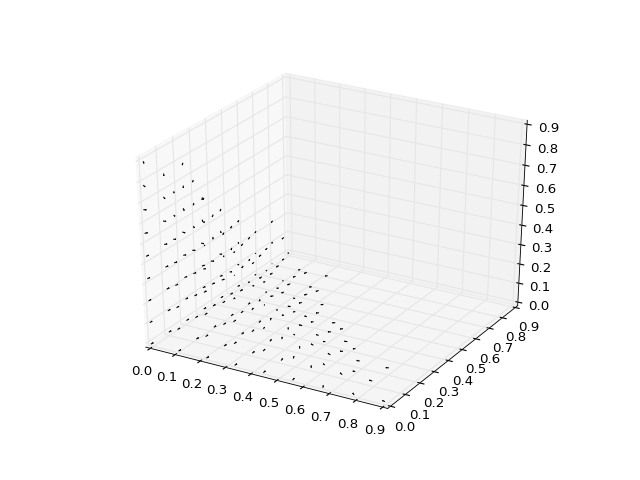

In [25]:
modelVectorCont2 = model8.vector('A', 'B', 'C')

In [26]:
modelVectorCont2.showLogs()

Starting 3d vector plot with parameters (g_{1}=10.0), (r_{1}=10.0), (a_{2}=10.0), (g_{3}=10.0), (a_{3}=10.0), (g_{2}=10.0), (a_{1}=10.0), (r_{2}=10.0), (s=10.0), (r_{3}=10.0), at 2017-09-15 15:48:50.245249


In [27]:
#model4._get_solutions()

<IPython.core.display.Javascript object>


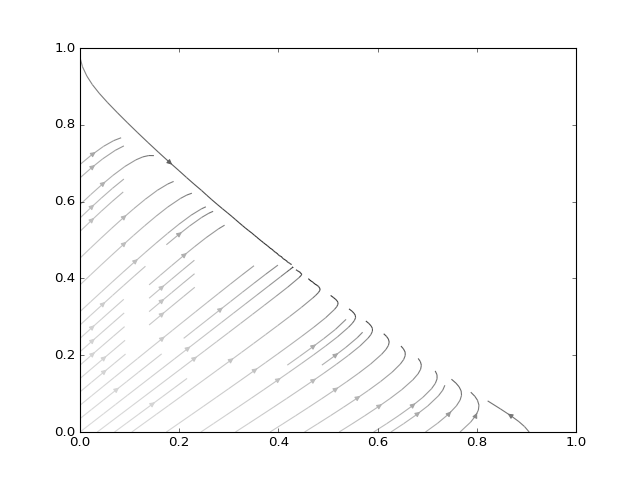

In [28]:
soloView1 = mmt.MuMoTstreamView(model6, None, 'A', 'B', params = [('s', 1), ('v', 2)])

In [29]:
model9 = model8.substitute('a_1 = a, a_2 = a, a_3 = a, g_1 = g, g_2 = g, g_3 = g, r_1 = r, r_2 = r, r_3 = 3')

<IPython.core.display.Javascript object>


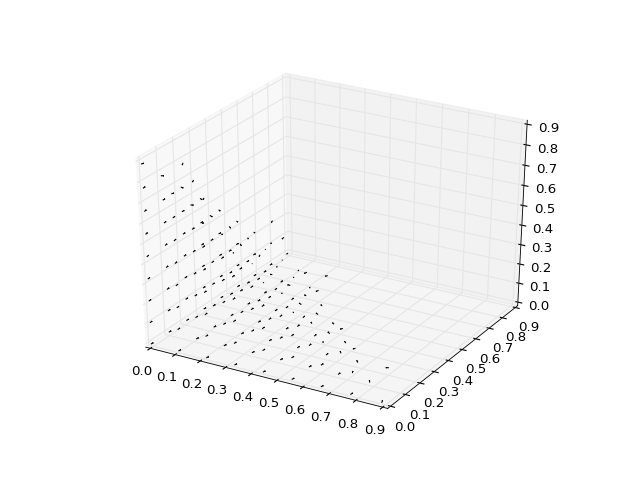

In [30]:
soloView2 = mmt.MuMoTvectorView(model9, None, 'A', 'B', 'C', params = [('s', 1), ('a', 1/2), ('r', 2), ('g', 2)])

bar<ipywidgets.widgets.widget_string.HTML object at 0x10c894ef0>


<IPython.core.display.Javascript object>


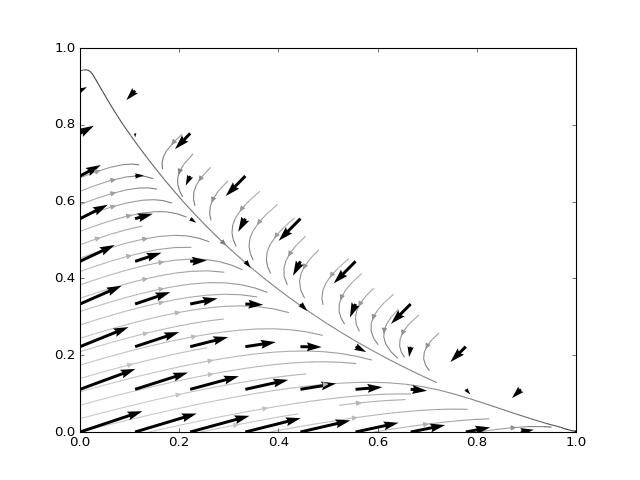

In [31]:
multiController1 = mmt.MuMoTmultiController([model4.stream('A', 'B', silent = True), model4.vector('A', 'B', silent = True)], shareAxes = True)

In [47]:
multiController1.showLogs()

Starting 2d stream plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-09-15 15:48:51.150636
Starting 2d vector plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-09-15 15:48:51.580714
Starting 2d stream plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-09-15 15:55:16.038313
Starting 2d vector plot with parameters (Delta=10.0), (mu=10.0), (s=21.1), at 2017-09-15 15:55:16.504759


bar<ipywidgets.widgets.widget_string.HTML object at 0x10ca95470>


<IPython.core.display.Javascript object>


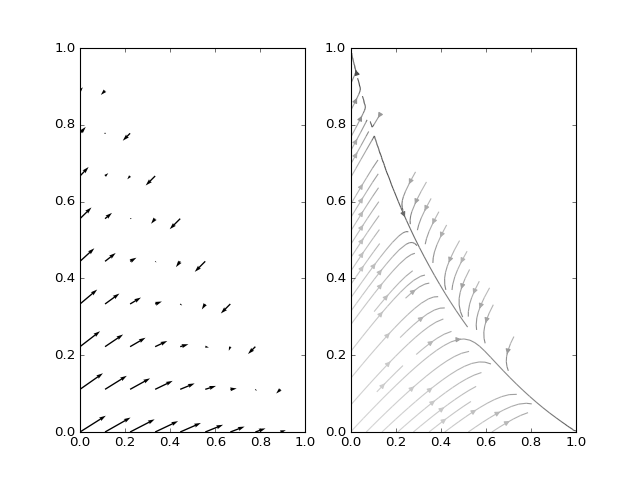

In [33]:
multiController2 = mmt.MuMoTmultiController([model4.vector('A', 'B', silent = True), model4.stream('A', 'B', silent = True)])

In [46]:
multiController2.showLogs()

Starting 2d vector plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-09-15 15:48:51.728404
Starting 2d stream plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-09-15 15:48:51.769654
Starting 2d vector plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-09-15 15:49:30.609913
Starting 2d stream plot with parameters (Delta=10.0), (mu=14.0), (s=10.0), at 2017-09-15 15:49:30.717247
Starting 2d vector plot with parameters (Delta=10.0), (mu=14.0), (s=10.0), at 2017-09-15 15:49:34.868876
Starting 2d stream plot with parameters (Delta=10.0), (mu=28.7), (s=10.0), at 2017-09-15 15:49:34.911948
Starting 2d vector plot with parameters (Delta=10.0), (mu=28.7), (s=10.0), at 2017-09-15 15:51:21.073728
Starting 2d stream plot with parameters (Delta=10.0), (mu=22.1), (s=10.0), at 2017-09-15 15:51:21.114397
Starting 2d vector plot with parameters (Delta=10.0), (mu=22.1), (s=10.0), at 2017-09-15 15:51:24.179588
Starting 2d stream plot with parameters (Delta=10.0), (

In [35]:
multiController3 = mmt.MuMoTmultiController([model4.stream('A', 'B', silent = True), model4.vector('A', 'B', silent = True)], shareAxes = True, silent = True)

bar<ipywidgets.widgets.widget_string.HTML object at 0x10cc01898>


<IPython.core.display.Javascript object>


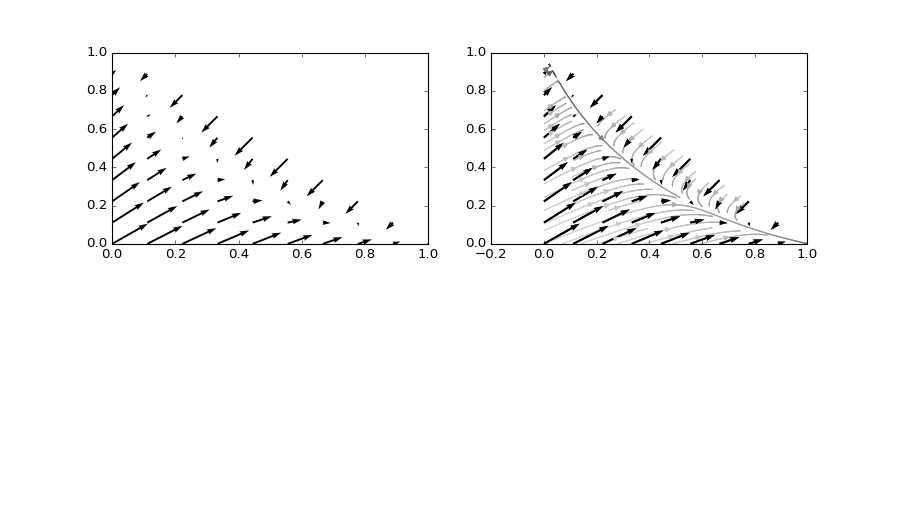

In [36]:
multiController4 = mmt.MuMoTmultiController([model4.vector('A', 'B', silent = True), multiController3])

In [44]:
multiController4.showLogs()

Starting 2d vector plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-09-15 15:48:52.375069
Starting 2d stream plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-09-15 15:48:52.417465
Starting 2d vector plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-09-15 15:48:52.769837
Starting 2d stream plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-09-15 15:48:52.772578
Starting 2d vector plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-09-15 15:48:53.118194
Starting 2d vector plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-09-15 15:49:01.322738
Starting 2d stream plot with parameters (Delta=10.0), (mu=18.1), (s=10.0), at 2017-09-15 15:49:01.364103
Starting 2d vector plot with parameters (Delta=10.0), (mu=18.1), (s=10.0), at 2017-09-15 15:49:01.740168
Starting 2d stream plot with parameters (Delta=10.0), (mu=18.1), (s=10.0), at 2017-09-15 15:49:01.743161
Starting 2d vector plot with parameters (Delta=10.0), (